<a href="https://colab.research.google.com/github/shivanginayak-bit/shivanginayak-bit/blob/main/phyloSnippets_Importing_libraries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing a library that is not in Colaboratory

To import a library that's not in Colaboratory by default, you can use `!pip install` or `!apt-get install`.

In [ ]:
!pip install matplotlib-venn

In [ ]:
!apt-get -qq install -y libfluidsynth1

# Install 7zip reader [libarchive](https://pypi.python.org/pypi/libarchive)

In [ ]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

# Install GraphViz & [PyDot](https://pypi.python.org/pypi/pydot)

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

# Install [cartopy](http://scitools.org.uk/cartopy/docs/latest/)

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:

from nltk.corpus.reader.wordlist import line_tokenize
import pandas as pd
import numpy as np
import scipy as sp


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob,Word
import nltk
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline

In [ ]:
yelp= pd.read_csv("/content/archive (7).zip")
yelp.shape

(10000, 10)

In [ ]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [ ]:
yelp.tail()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [ ]:
yelp_best_worst=yelp


In [ ]:
X=yelp_best_worst.text
Y=yelp_best_worst.stars

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1)


In [ ]:
X_train.shape

(7500,)

In [ ]:
X_test.shape

(2500,)

In [ ]:
X_train

651     Having lived in Chicago for most of my life I ...
6560    Clean facility, prices are super low! You can'...
8974    This is my absolute favorite restaurant in Pho...
2348    Taste buds went CRRRAAZZYYY!!\n\nFinally made ...
5670    OPEN for business!!  It's located in the Canyo...
                              ...                        
2895    Wait a second...I have not written a review!  ...
7813    This is by far the best farmer's market I've b...
905     The facility is a bit dated, but the service i...
5192    There are a lot of things I miss about SoCal a...
235     I used to frequent the Lost Leaf almost daily ...
Name: text, Length: 7500, dtype: object

In [ ]:
vect= CountVectorizer(stop_words='english',lowercase=True)

In [ ]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [ ]:
len(vect.get_feature_names_out())

25496

In [ ]:
X_train_dtm = vect.fit_transform(X_train)

In [ ]:
X_train_dtm

<7500x25496 sparse matrix of type '<class 'numpy.int64'>'
	with 378882 stored elements in Compressed Sparse Row format>

In [ ]:
type(X_train_dtm)

scipy.sparse._csr.csr_matrix

In [ ]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
demo=pd.DataFrame(X_train_dtm.toarray())
demo.columns=vect.get_feature_names_out()
demo


,00,000,007,00a,00am,00pm,01,02,04,05,...,zur,zuzu,zuzus,zweigel,zwiebel,zy,zzed,zzzzzzzzzzzzzzzzz,école,òc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(len(vect.get_feature_names_out()))

25496


In [ ]:
print(vect.get_feature_names_out()[0:10000])

['00' '000' '007' ... 'goooood' 'gooooooood' 'gooped']


In [ ]:
import sklearn
print(sklearn.__version__)

1.3.0


In [ ]:
X_train

651     Having lived in Chicago for most of my life I ...
6560    Clean facility, prices are super low! You can'...
8974    This is my absolute favorite restaurant in Pho...
2348    Taste buds went CRRRAAZZYYY!!\n\nFinally made ...
5670    OPEN for business!!  It's located in the Canyo...
                              ...                        
2895    Wait a second...I have not written a review!  ...
7813    This is by far the best farmer's market I've b...
905     The facility is a bit dated, but the service i...
5192    There are a lot of things I miss about SoCal a...
235     I used to frequent the Lost Leaf almost daily ...
Name: text, Length: 7500, dtype: object

In [ ]:
classification_report,
from sklearn.metrics import confusion_matrix.classification_report
vect= CountVectorizer(stop_words='english',lowercase=True,min_df=10)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.fit_transform(X_test)
print(X_train_dtm.shape)
print(X_test_dtm.shape
from sklearn.linear_model import LogisticRegression
nb=MultinomialNB()
nb.fit()


In [1]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 25.2 MB/s eta 0:00:00


In [5]:
from Bio import SeqIO
import matplotlib.pyplot as plt
!pip install networkx
import networkx as nx



In [6]:
# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add edges
G.add_edge(1, 2)
G.add_edge(2, 3)

# Print the nodes and edges of the graph
print("Nodes:", G.nodes())
print("Edges:", G.edges())

Nodes: [1, 2, 3]
Edges: [(1, 2), (2, 3)]


In [8]:
!pip install pygraphviz
!pip install pydot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pygraphviz
  Running setup.py clean for pygraphviz
Failed to build pygraphviz
ERROR: Could not build wheels for pygraphviz, which is required to install pyproject.toml-based projects


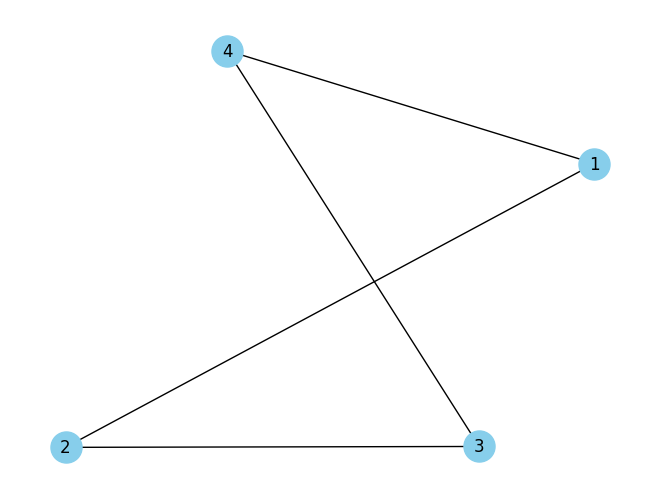

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 1)

# Draw the graph using matplotlib
pos = nx.spring_layout(G)  # Compute node positions
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=12)
plt.show()  # Display the graph


In [10]:
from Bio import Phylo